# Analysis for Kickstarter
Kickstarter has established itself as the leading platform for funding creative
ventures. Aspiring entrepreneurs in the arts can initiate fundraising campaigns on Kickstarter to support their
projects. Some projects have been hugely successful, whereas many others have fallen well short of their
fundraising objectives. The attached data file contains sample data on over 4000 Kickstarter fundraising
campaigns. Each row contains a summary of each campaign, including the goal and amount pledged, the state
of the project in securing funding (e.g., successful, failed), the category of the project (i.e., type of art), and
whether the project was featured via a staff pick or spotlight (i.e., on the Kickstarter home page).

# 1. Loading the data set. 

In [51]:
#importing all thr required libraries 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = np.loadtxt('HW4_kickstarter.csv',delimiter=',',ndmin=1,skiprows=1,usecols=11)
data


array([ 321.       ,  857.0681028, 4431.12     , ...,   50.       ,
        220.2370882,  155.       ])

# 2. Descriptive statistics

In [52]:
#performing descriptive statistics
size=data.size
print("Total number of projects:",+size)
minimum=data.min()
print("Minimum pledged funding is:",+minimum)
maximum=data.max()
print("Maximum pledged funding is:",+maximum)
mean=data.mean()
print("Mean value of the pledged funding value is:",+mean)
median=np.median(data)
print("Median value of pledged funding value is:",+median)
std=data.std()
print("Standard deviation of pledged funding value is:",+std)
count=0

#to calculate the percentage of project funding greater than 2500. 
for i in data: 
    if i>2500:
        count=count+1
count

percent=count/size
print("The percentage of projects that earned total pledged greater than $2500 is : ",+percent)


Total number of projects: 4184
Minimum pledged funding is: 0.0
Maximum pledged funding is: 111111.77
Mean value of the pledged funding value is: 1242.1242686279124
Median value of pledged funding value is: 90.0
Standard deviation of pledged funding value is: 5177.92798555567
The percentage of projects that earned total pledged greater than $2500 is :  0.10516252390057361


# 3. Loading project categories.

In [53]:
category = np.loadtxt('HW4_kickstarter.csv',dtype='str',delimiter=',',ndmin=1,skiprows=1,usecols=12)


# 4. Visualizing the categories

['Ceramics' 'Conceptual Art' 'Digital Art' 'Illustration' 'Painting'] [ 204  879 1054  461 1586]
[0.04875717 0.21008604 0.25191205 0.11018164 0.3790631 ]


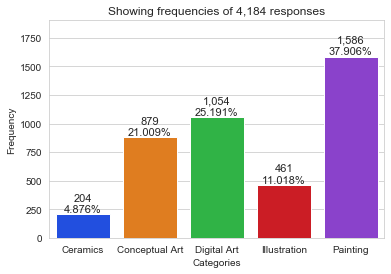

In [54]:
#counting the frequencies of the categories and plotting the values 
values, frequencies = np.unique(category, return_counts=True)
title = f'Showing frequencies of {len(category):,} responses'
sns.set_style('whitegrid')
axes = sns.barplot(x=values, y=frequencies, palette='bright')
axes.set_title(title)
axes.set(xlabel='Categories', ylabel='Frequency')  
axes.set_ylim(top=max(frequencies) * 1.20)

percent=frequencies/size
print(values,frequencies)
print(percent)

for bar, frequency in zip(axes.patches, frequencies):
    text_x = bar.get_x() + bar.get_width() / 2.0  
    text_y = bar.get_height() 
    text = f'{frequency:,}\n{frequency / len(category):.3%}'
    axes.text(text_x, text_y, text, 
              fontsize=11, ha='center', va='bottom')

# 5. Inferences:

1) After looking at the bar chart, we can clearly see that the Painting is the most common category of projects on kickstarter.

2) Projects related to ceramics is the least common category of projects on kickstarter.


# 6. Loading the state data.

In [55]:
state = np.loadtxt('HW4_kickstarter.csv',dtype='str',delimiter=',',ndmin=1,skiprows=1,usecols=4)


# 7. Vizualizing the project success for each category

In [7]:
# counting unique values of successful projects across different categories
success_cat, success_cat_freq = np.unique(category[state == 'successful'], return_counts=True)
success_cat
success_cat_freq


array([ 84, 322, 286], dtype=int64)

In [13]:
#calculating proportion of successful projects among all categories
success_cat_count = np.zeros(len(success_cat))
for i in range(len(success_cat)):
    success_cat_count[i] = len(category[category == success_cat[i]])
cat_success_percent = success_cat_freq/success_cat_count
cat_success_percent

array([0.41176471, 0.36632537, 0.27134725])

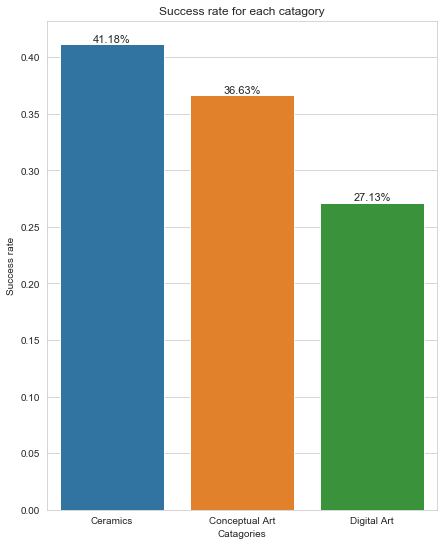

In [16]:
#plotting the success rate of each
plt.figure(figsize=(7,9))
axes = sns.barplot(success_cat, cat_success_percent)
plt.title('Success rate for each catagory')
plt.ylabel('Success rate')
plt.xlabel('Catagories')

for bar, frequency in zip(axes.patches, cat_success_percent):
    text_x = bar.get_x() + bar.get_width() / 2.0  
    text_y = bar.get_height() 
    text = f'{frequency*100:.2f}%'
    axes.text(text_x, text_y, text, 
              fontsize=11, ha='center', va='bottom')

# 8. Loading staff pick and spotlight data

In [56]:
staff=np.loadtxt('HW4_kickstarter.csv',dtype='str',delimiter=',',ndmin=1,skiprows=1,usecols=8)
spot=np.loadtxt('HW4_kickstarter.csv',dtype='str',delimiter=',',ndmin=1,skiprows=1,usecols=13)



Number of Staff picked projects
FALSE: 3960
TRUE: 224


# 9. Classifying projects

In [ ]:
## counting unique values of staff picked projects
if_staff, staff_freq = np.unique(staff, return_counts=True)
print('Number of Staff picked projects')
for i in range(len(if_staff)):
    print(if_staff[i] + ': ' + str(staff_freq[i]))


In [57]:
success_staff, success_staff_freq = np.unique(staff[state == 'successful'], return_counts=True)

# calculating Success rate for each kind
success_staff_pick = success_staff_freq/staff_freq

print('Success rate of Staff picked projects')
for i in range(len(if_staff)):
    print(if_staff[i] + ': ' + "{0:.2f}%".format(100*success_staff_pick[i]))

Success rate of Staff picked projects
FALSE: 13.36%
TRUE: 72.77%


In [58]:
if_spot, spot_freq = np.unique(spot, return_counts=True)

print('Number of Spotlight picked projects')
for i in range(len(if_spot)):
    print(if_spot[i] + ': ' + str(spot_freq[i]))

Number of Spotlight picked projects
FALSE: 3492
TRUE: 692


In [60]:
# Success frequency of spot picked projects
success_spot, success_spot_freq = np.unique(spot[state == 'successful'], return_counts=True)

# Success rate of each kind
success_spot_pick = success_spot_freq/spot_freq

# print output
print('Success rate of Spotlight picked projects')
for i in range(len(if_spot)):
    print(if_spot[i] + ': ' + "{0:.2f}%".format(100*success_spot_pick[i]))

Success rate of Spotlight picked projects
FALSE: 19.82%
TRUE: 100.00%


# 11. Inferences:
1. As we can see from the percentages, that spotlight has more success rate(100%) than staff picked projects.
2. However, the failure rate of spotlight projects(19.82%) are more than that of staff picked projects(13.36%)


In [30]:
country=np.loadtxt('HW4_kickstarter.csv',dtype='str',delimiter=',',ndmin=1,skiprows=1,usecols=5)
country


array(['US', 'SE', 'US', ..., 'US', 'GB', 'US'], dtype='<U2')

In [61]:
# frequency of projects by countries
country_name, country_freq = np.unique(country, return_counts=True)

print('List of countries and number of projects')
for i in range(len(country_name)):
    print(country_name[i] + ': ' + str(country_freq[i]))

List of countries and number of projects
AT: 2
AU: 79
BE: 10
CA: 190
CH: 6
DE: 27
DK: 15
ES: 19
FR: 16
GB: 371
IE: 8
IT: 23
NL: 48
NO: 6
NZ: 5
SE: 23
US: 3336


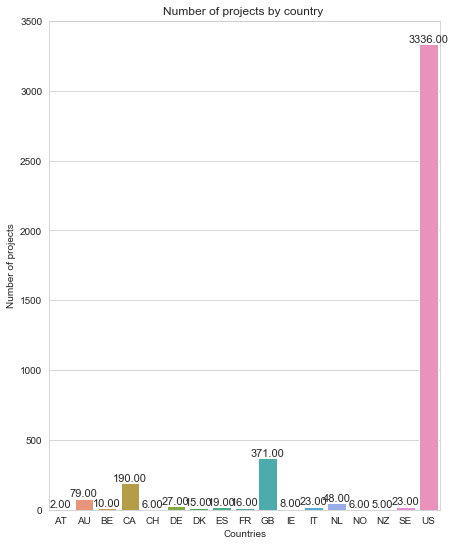

In [40]:
plt.figure(figsize=(7,9))
axes = sns.barplot(country_name, country_freq)
plt.title('Number of projects by country ')
plt.ylabel('Number of projects')
plt.xlabel('Countries')

for bar, frequency in zip(axes.patches, country_freq):
    text_x = bar.get_x() + bar.get_width() / 2.0  
    text_y = bar.get_height() 
    text = f'{frequency:.2f}'
    axes.text(text_x, text_y, text, 
              fontsize=11, ha='center', va='bottom')

Most popular currencies and number of projects
AUD: 79
CAD: 190
CHF: 6
DKK: 15
EUR: 153
GBP: 371
NOK: 6
NZD: 5
SEK: 23
USD: 3336


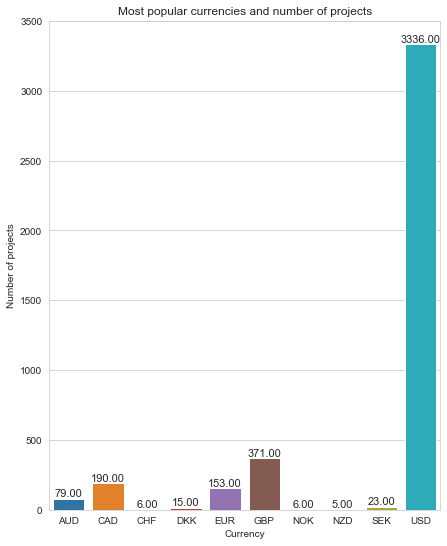

In [62]:
curr=np.loadtxt('HW4_kickstarter.csv',dtype='str',delimiter=',',ndmin=1,skiprows=1,usecols=6)

# frequency of currency for different projects.
curr_name, curr_freq = np.unique(curr, return_counts=True)


print('Most popular currencies and number of projects')
for i in range(len(curr_name)):
    print(curr_name[i] + ': ' + str(curr_freq[i]))

plt.figure(figsize=(7,9))
axes = sns.barplot(curr_name, curr_freq)
plt.title('Most popular currencies and number of projects')
plt.ylabel('Number of projects')
plt.xlabel('Currency')

for bar, frequency in zip(axes.patches, curr_freq):
    text_x = bar.get_x() + bar.get_width() / 2.0  
    text_y = bar.get_height() 
    text = f'{frequency:.2f}'
    axes.text(text_x, text_y, text, 
              fontsize=11, ha='center', va='bottom')

# Insights
1. Here I have analyzed the countries and the number of projects from all countries.
2. We can infer that US has the most number of projects than any other country combined.
3. We can say that start up environment/motiavation is more in US than any other countries, and that government policies might be good, that is facilitating new start up ideas. 
4. We can also infer that since there are so many projects from US alone, there must be a trend amongst people that makes them to consider launching new ideas than working for a company, it promotes entrepreneurship. 
5. From the currency plot we can see that popular currency of funding is USD and hence justifices that it is correlated with the most projects in the US. 